In [1]:
import  atmPy.aerosols.instruments.POPS.file_io as popsio

In [2]:
reload(popsio)
reload(popsio.atmpopshk)

<module 'atmPy.aerosols.instruments.POPS.housekeeping' from '/mnt/telg/prog/atm-py/atmPy/aerosols/instruments/POPS/housekeeping.py'>

In [3]:
hk = popsio.read_hk_file('HK_20211111x003.csv',
                            version='BBB_02',
                            pattern='HK',
                            size_bins='Dp100_1p76.txt',
                            skip_histogram=False,
                            ignore_colums=[],
                            verbose=False,)

In [4]:
dist = hk['sizedistribution']

In [5]:
# you might want to rebin the data to get equaly spaced bins
dist = dist.re_bin(number_of_bins=50)

In [6]:
dist = dist.convert2dNdlogDp()

In [7]:
#The following adds an altitude to the housekeeping
#Note, this is a very simple approximation of the altitude!!!! You will probably want to use an exteranlly measuremd altitude?!?
dist.housekeeping.data['Altitude'] = dist.housekeeping.get_altitude() 

In [24]:
dist_vp = dist.convert2verticalprofile(layer_thickness=100)

(<Figure size 1560x1040 with 4 Axes>,
 (<AxesSubplot:xlabel='Particle diameter (nm)', ylabel='$\\mathrm{d}N\\,/\\,\\mathrm{d}log(D_{P})$ (cm$^{-3}$)'>,
  <AxesSubplot:xlabel='Particle diameter (nm)', ylabel='Altitude (m)'>,
  <AxesSubplot:xlabel='Concentration (cm$^{-3}$)'>))

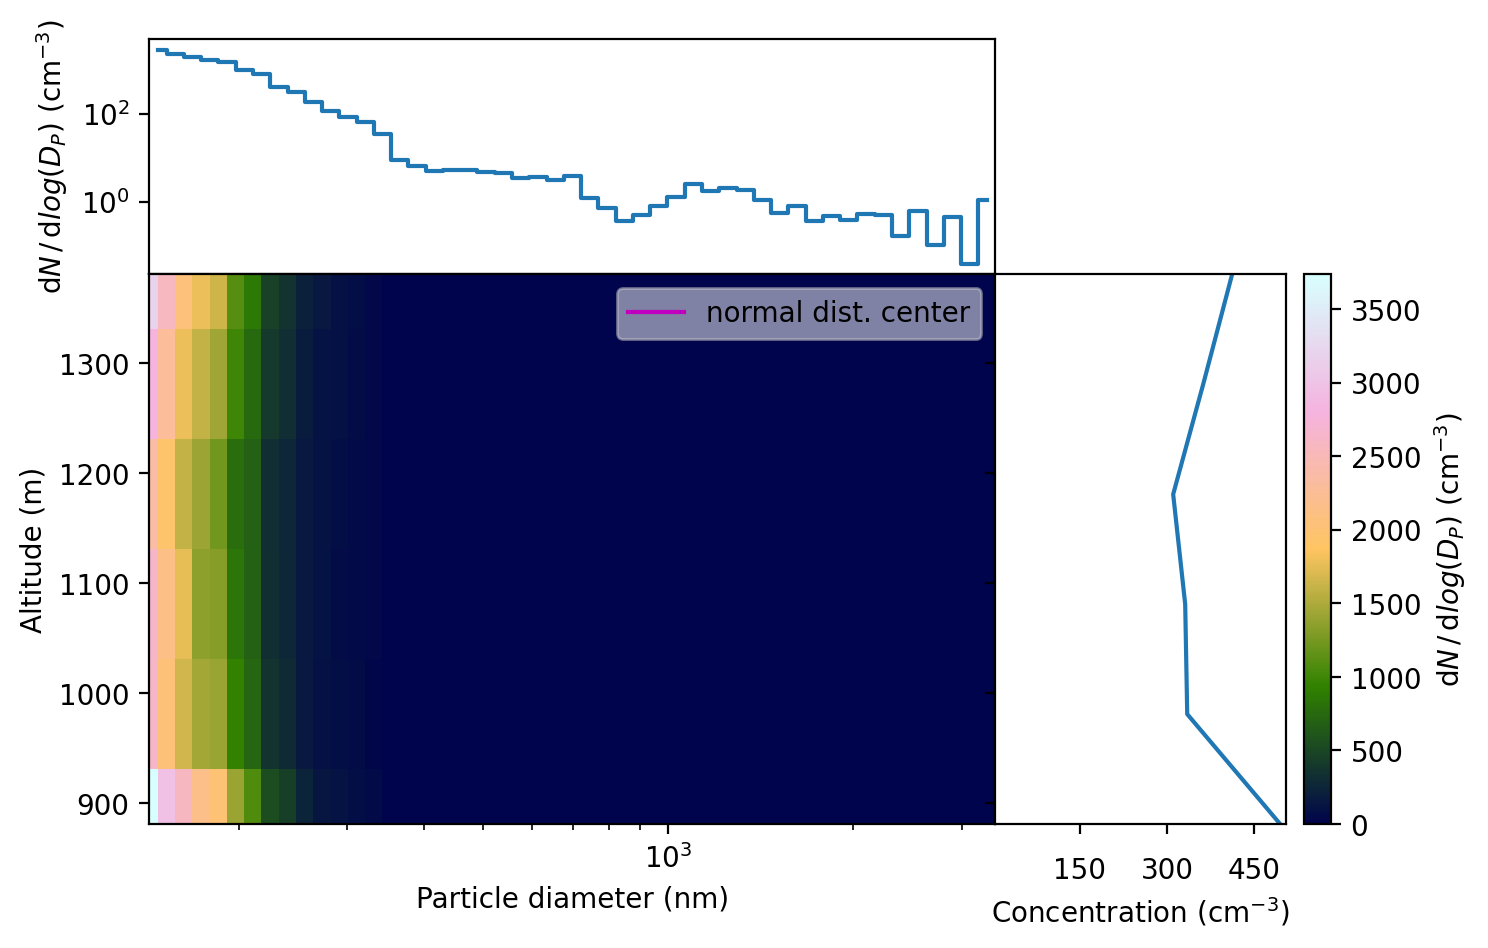

In [25]:
dist_vp.plot_overview()

In [26]:
dist_vp.optical_properties.parameters.refractive_index = 1.5
dist_vp.optical_properties.parameters.wavelength = 550

In [27]:
# AOD
dist_vp.optical_properties.aod

0.004265953234239284

Text(0.5, 0, 'Extinction coefficient (m$^{-1}$)')

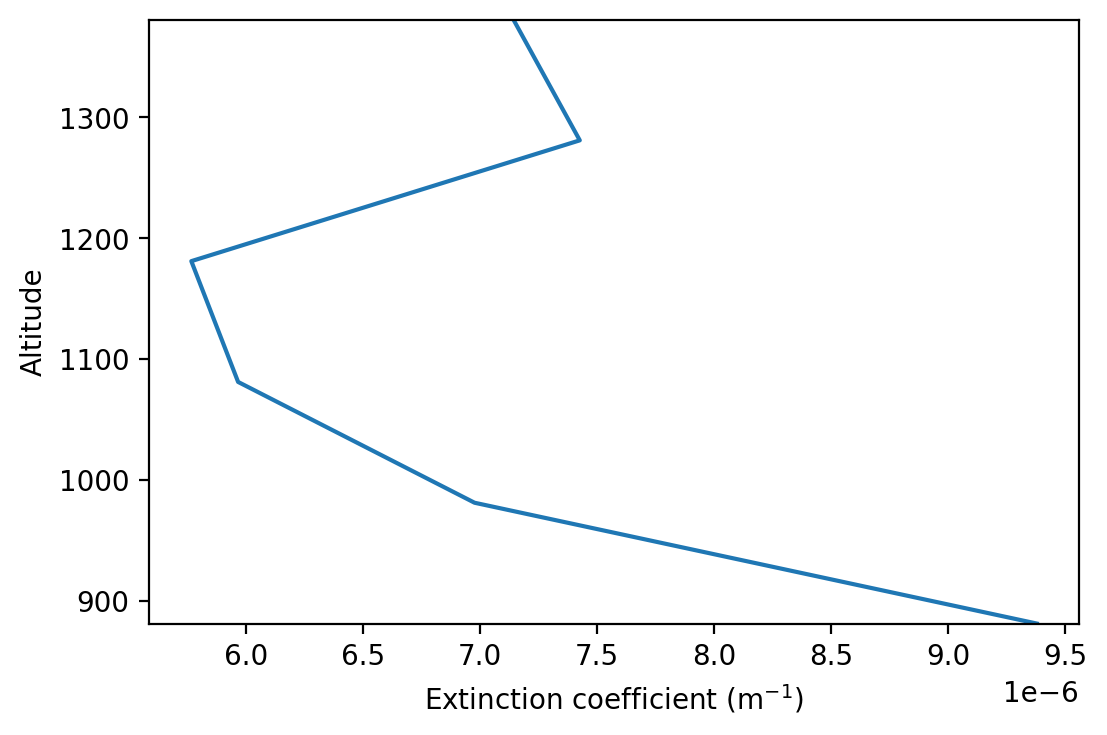

In [29]:
a = dist_vp.optical_properties.extinction_coeff.plot()
a.set_xlabel('Extinction coefficient (m$^{-1}$)')